In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'/Users/kkubiak/Library/Mobile Documents/com~apple~CloudDocs/CSIT/DSSE/Lab2/us contagious diseases.csv')

In [3]:
df_measles = df[df['disease'] == 'Measles']

In [4]:
df_measles = df_measles[~df_measles['state'].isin(['Alaska', 'Hawaii'])].drop('disease', axis=1).drop('Unnamed: 0', axis=1).reset_index(drop=True)

In [5]:
df_measles['rate'] = (df_measles['count'] / df_measles.weeks_reporting / df_measles['population']) * 1e5

In [6]:
df_measles

,state,year,weeks_reporting,count,population,rate
0,Alabama,1928,52,8843,2589923.0,6.566129
1,Alabama,1929,49,2959,2619131.0,2.305641
2,Alabama,1930,52,4156,2646248.0,3.020241
3,Alabama,1931,49,8934,2670818.0,6.826618
4,Alabama,1932,41,270,2693027.0,0.244534
...,...,...,...,...,...,...
3670,Wyoming,1998,0,0,479897.0,NaN
3671,Wyoming,1999,0,0,486758.0,NaN
3672,Wyoming,2000,0,0,493782.0,NaN
3673,Wyoming,2001,0,0,500794.0,NaN


In [7]:
df_measles

,state,year,weeks_reporting,count,population,rate
0,Alabama,1928,52,8843,2589923.0,6.566129
1,Alabama,1929,49,2959,2619131.0,2.305641
2,Alabama,1930,52,4156,2646248.0,3.020241
3,Alabama,1931,49,8934,2670818.0,6.826618
4,Alabama,1932,41,270,2693027.0,0.244534
...,...,...,...,...,...,...
3670,Wyoming,1998,0,0,479897.0,NaN
3671,Wyoming,1999,0,0,486758.0,NaN
3672,Wyoming,2000,0,0,493782.0,NaN
3673,Wyoming,2001,0,0,500794.0,NaN


In [8]:
ca_measles = df_measles[df_measles.state == 'California']
# ca_measles['sqrt_rate'] = np.sqrt(ca_measles['rate'])

In [9]:
ca_measles['sqrt_rate'] = ca_measles['rate']**0.5

/var/folders/vs/kcjt58gj02q7hl49djt4j_v80000gn/T/ipykernel_20414/3835915257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_measles['sqrt_rate'] = ca_measles['rate']**0.5


In [10]:
ca_measles

,state,year,weeks_reporting,count,population,rate,sqrt_rate
225,California,1928,52,3698,5230775.0,1.359557,1.166001
226,California,1929,52,4024,5465979.0,1.415750,1.189853
227,California,1930,52,43416,5677251.0,14.706468,3.834901
228,California,1931,52,27807,5856343.0,9.131125,3.021775
229,California,1932,52,12618,6004994.0,4.040867,2.010191
...,...,...,...,...,...,...,...
295,California,1998,31,4,33212395.0,0.000389,0.019711
296,California,1999,42,18,33544208.0,0.001278,0.035744
297,California,2000,38,15,33871648.0,0.001165,0.034138
298,California,2001,40,34,34199784.0,0.002485,0.049854


In [11]:
vaccine_year = 1963

<Figure size 2000x4000 with 0 Axes>

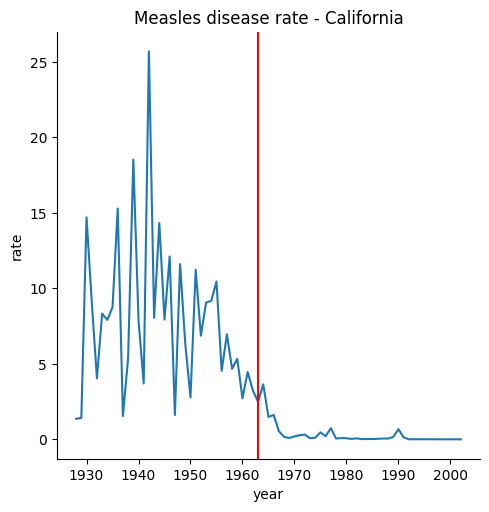

In [12]:
plt.figure(figsize=(20, 40)) 
sns.relplot(data = df_measles[df_measles.state == 'California'],
            x = 'year',
            y = 'rate',
            kind='line').set(title='Measles disease rate - California')
plt.axvline(x = vaccine_year, color='red')
plt.show()

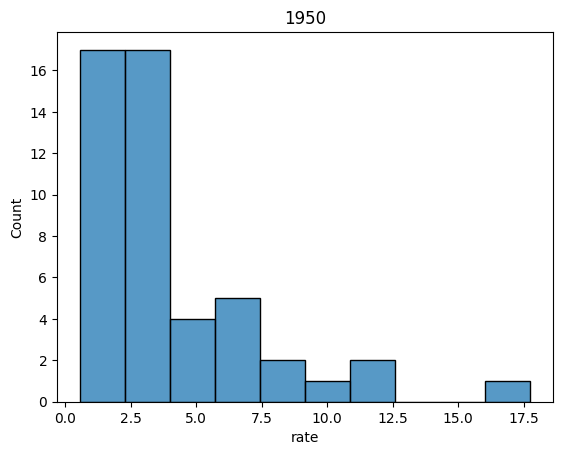

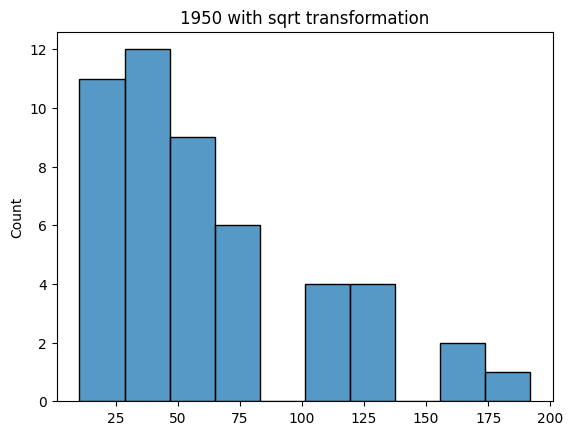

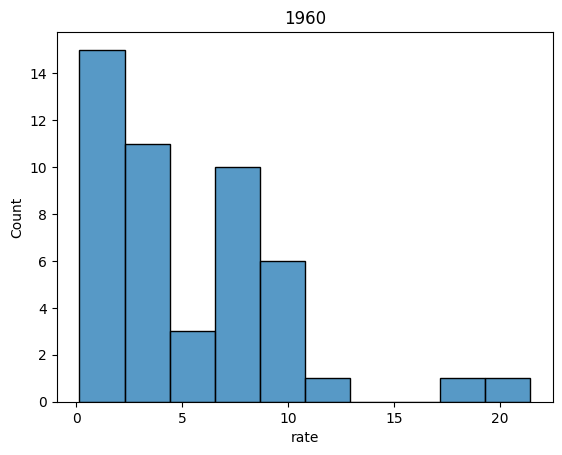

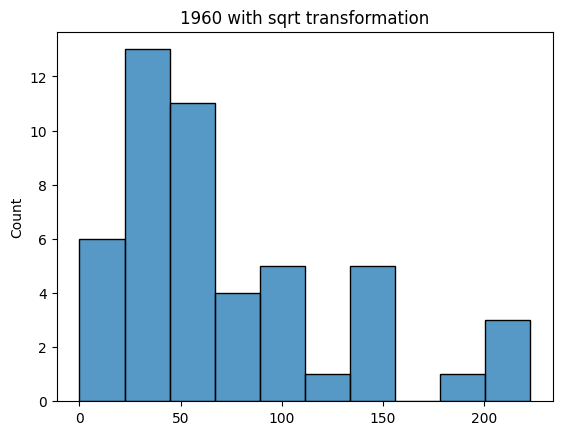

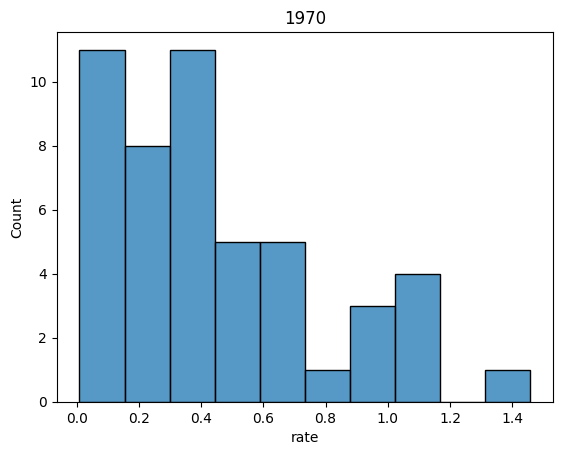

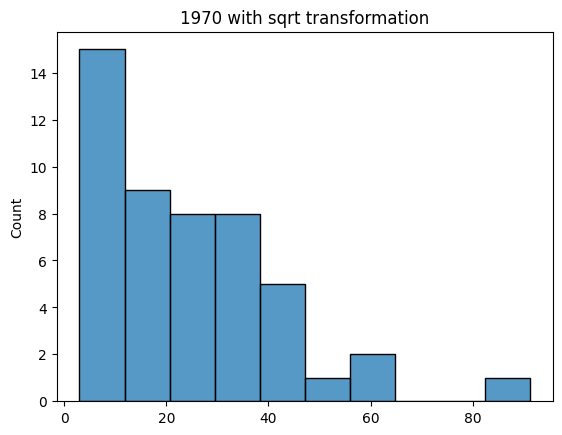

In [13]:
for y in [1950, 1960, 1970]:
    subdata = df_measles[df_measles.year == y]
    sns.histplot(data=subdata,
                 x="rate", bins=10).set(title=f"{y}")
    plt.show()
    
    x_data = [rate ** 0.5 for rate in subdata["count"]]
    sns.histplot(data=subdata,
                 x=x_data, bins=10).set(title=f"{y} with sqrt transformation")
    plt.show()

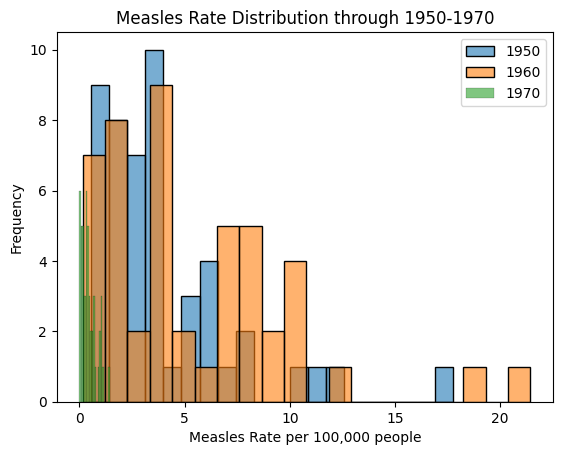

In [14]:
years = [1950, 1960, 1970]
for year in years:
    data = df_measles[df_measles['year'] == year]
    sns.histplot(data = data['rate'], bins=20, alpha=0.6, label=str(year))
plt.xlabel('Measles Rate per 100,000 people')
plt.ylabel('Frequency')
plt.title('Measles Rate Distribution through 1950-1970')
plt.legend()
plt.show()

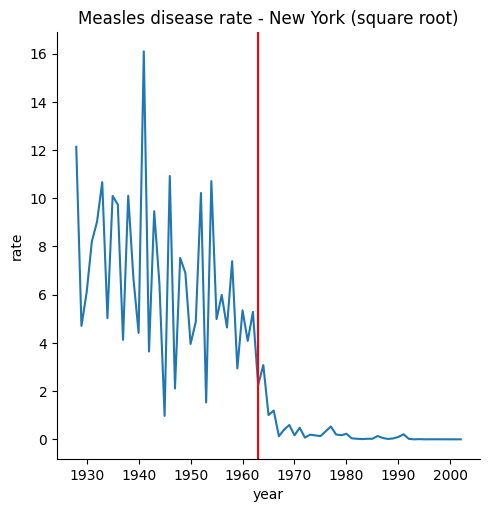

In [15]:
# 4.
MEASLES_VACCINE_INTRODUCTION_YEAR = 1963

subdata = df_measles[df_measles.state == 'New York']
y_data = [rate ** 0.5 for rate in subdata.rate]
sns.relplot(data=subdata,
            x='year',
            y='rate',
            kind='line').set(title="Measles disease rate - New York (square root)")
plt.axvline(x=MEASLES_VACCINE_INTRODUCTION_YEAR, color='red')
plt.show()

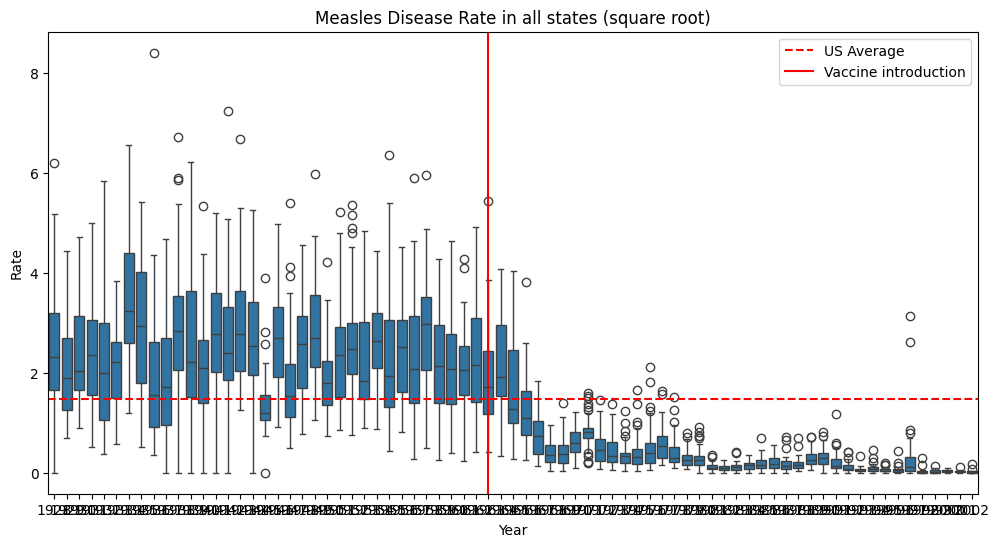

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_measles, x='year', y=df_measles['rate']**0.5)
plt.axhline(y=(df_measles['rate']**0.5).mean(), color='red', linestyle='--', label='US Average')
plt.axvline(x=vaccine_year-1928, color='red', label='Vaccine introduction')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Measles Disease Rate in all states (square root)')
plt.legend()
plt.show()

In [17]:

# plt.figure(figsize=(12, 6))

# sns.lineplot(data=df_measles, x='year', y=df_measles['sqrt_rate']**0.5, hue='state')

# # You can add a legend to distinguish states
# plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Set labels and title
# plt.xlabel('Year')
# plt.ylabel('Square Root of Measles Rate')
# plt.title('Measles Disease Rate Trends for All States')

# plt.show()

# ## std deviation + avg


/var/folders/vs/kcjt58gj02q7hl49djt4j_v80000gn/T/ipykernel_20414/227016102.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df_measles.pivot('state', 'year', 'sqrt_rate')


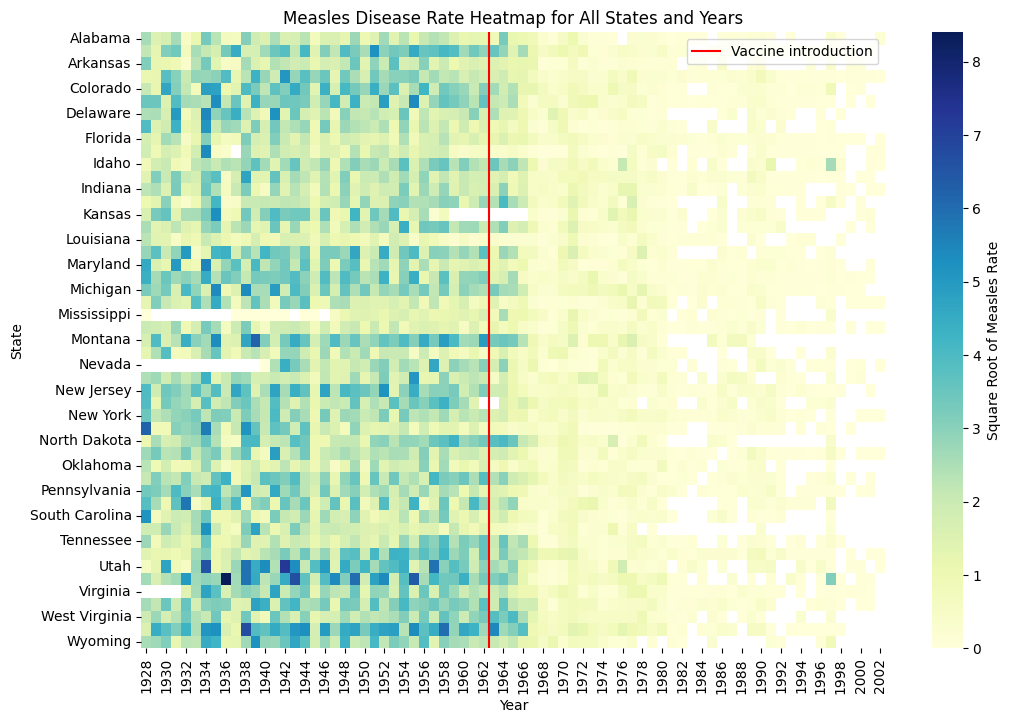

In [18]:
df_measles['sqrt_rate'] = np.sqrt(df_measles['rate'])
heatmap_data = df_measles.pivot('state', 'year', 'sqrt_rate')

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Create a heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt=".1f", cbar_kws={'label': 'Square Root of Measles Rate'})
plt.axvline(x=vaccine_year-1928, color='red', label='Vaccine introduction')
# Set labels and title
plt.xlabel('Year')
plt.ylabel('State')
plt.title('Measles Disease Rate Heatmap for All States and Years')
plt.legend()
plt.show()

In [19]:
vaccine_years = {
    'Measles': 1963,
    'Hepatitis A': 1995,
    'Mumps': 1967,
    'Pertussis': 1940,
    'Polio': 1955,
    'Rubella': 1967,
    'Smallpox': 1959,
}

/var/folders/vs/kcjt58gj02q7hl49djt4j_v80000gn/T/ipykernel_20414/1853545627.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  disease_heatmap =  df_disease.pivot('state', 'year', 'sqrt_rate')


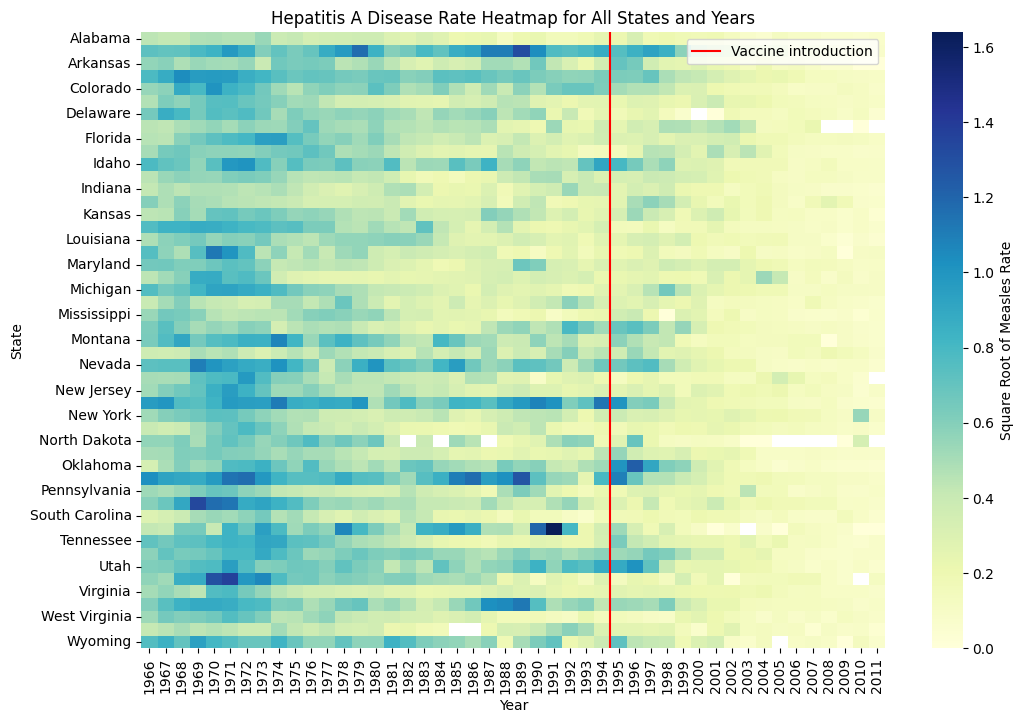

/var/folders/vs/kcjt58gj02q7hl49djt4j_v80000gn/T/ipykernel_20414/1853545627.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  disease_heatmap =  df_disease.pivot('state', 'year', 'sqrt_rate')


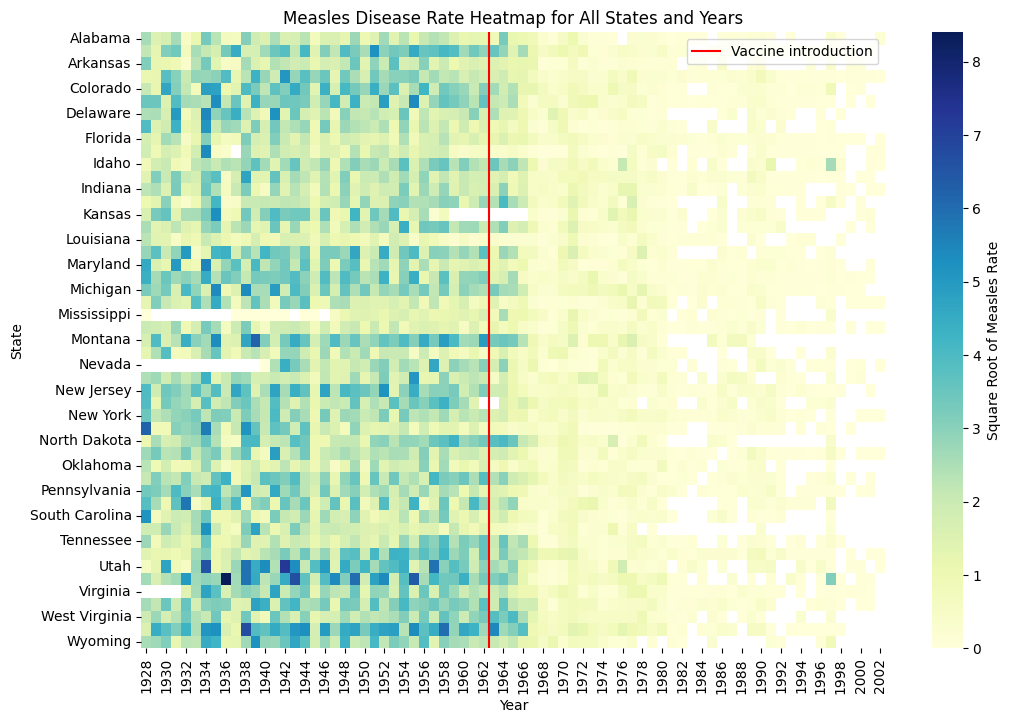

/var/folders/vs/kcjt58gj02q7hl49djt4j_v80000gn/T/ipykernel_20414/1853545627.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  disease_heatmap =  df_disease.pivot('state', 'year', 'sqrt_rate')


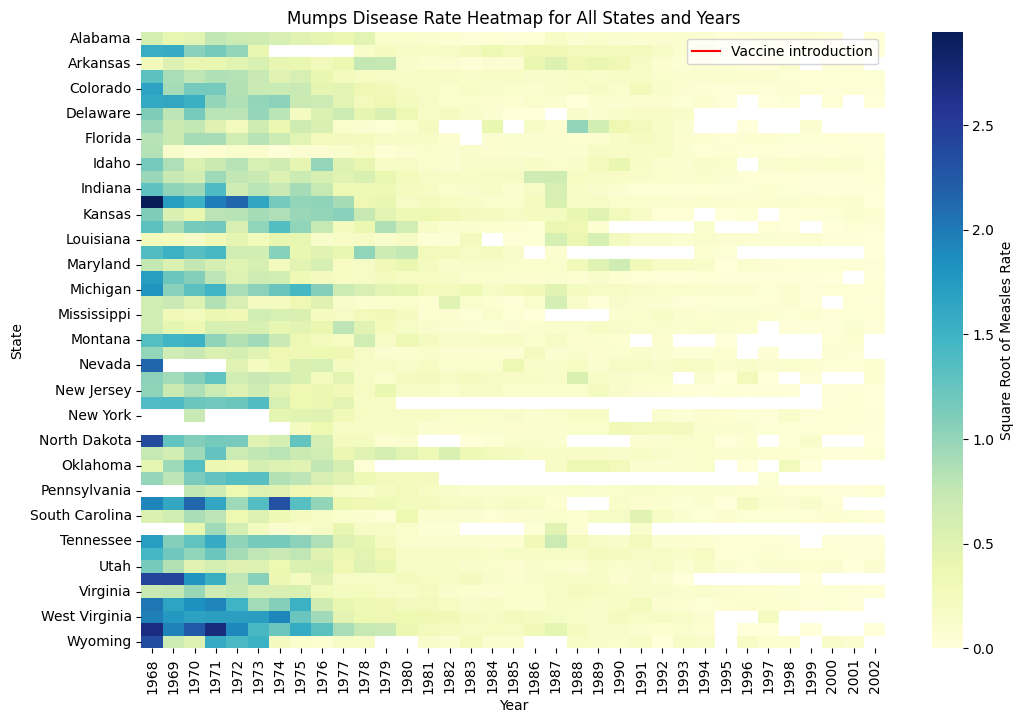

/var/folders/vs/kcjt58gj02q7hl49djt4j_v80000gn/T/ipykernel_20414/1853545627.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  disease_heatmap =  df_disease.pivot('state', 'year', 'sqrt_rate')


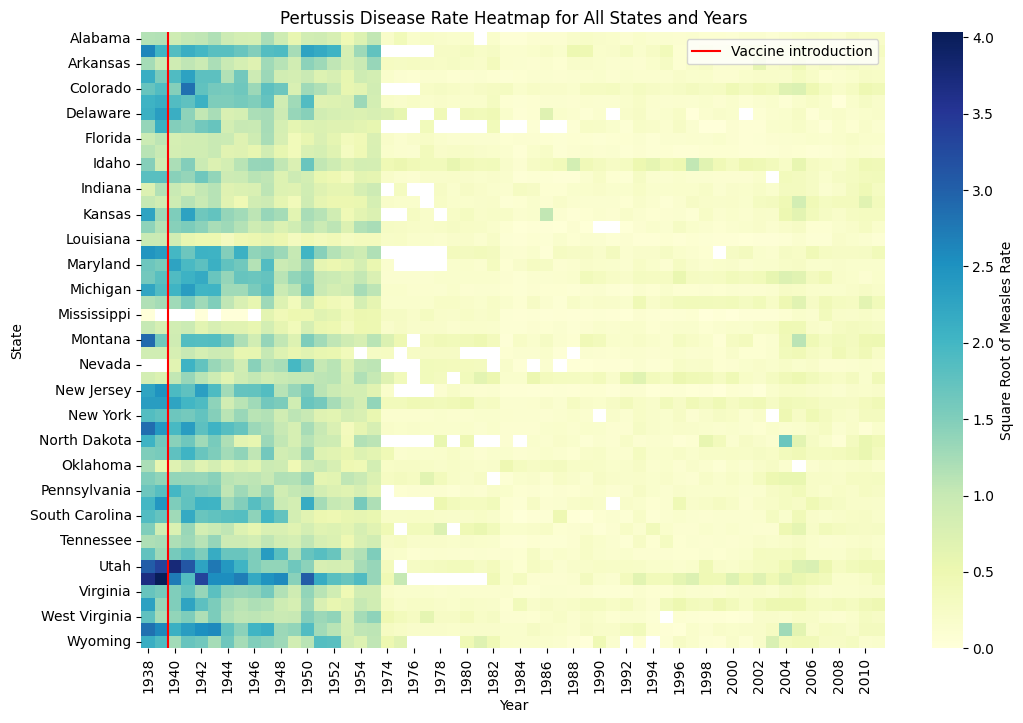

/var/folders/vs/kcjt58gj02q7hl49djt4j_v80000gn/T/ipykernel_20414/1853545627.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  disease_heatmap =  df_disease.pivot('state', 'year', 'sqrt_rate')


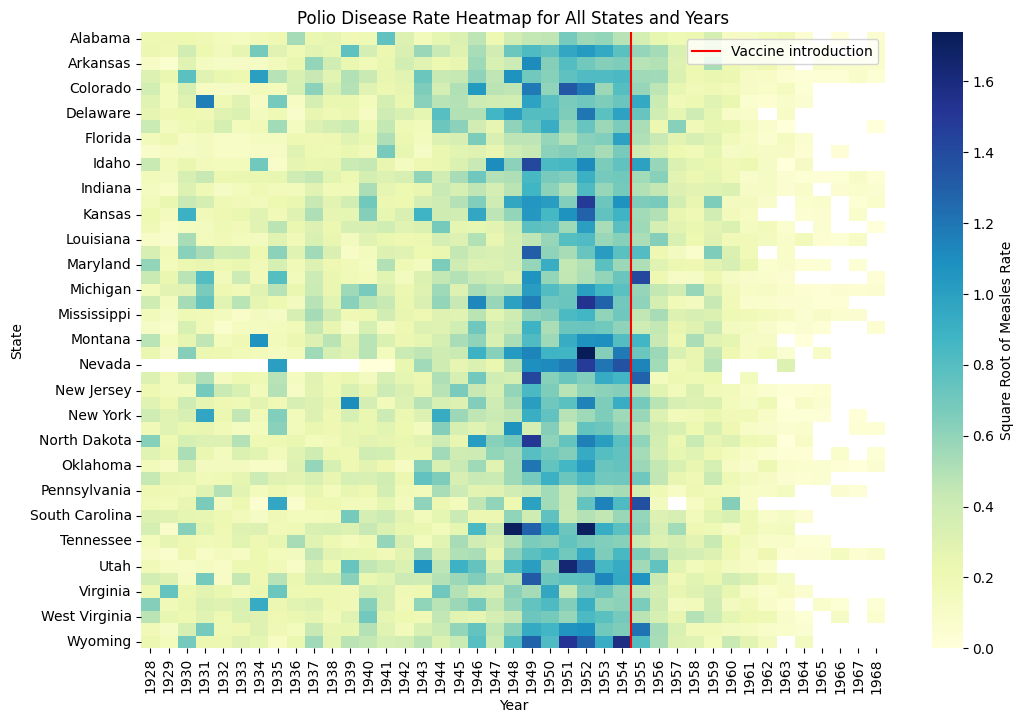

/var/folders/vs/kcjt58gj02q7hl49djt4j_v80000gn/T/ipykernel_20414/1853545627.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  disease_heatmap =  df_disease.pivot('state', 'year', 'sqrt_rate')


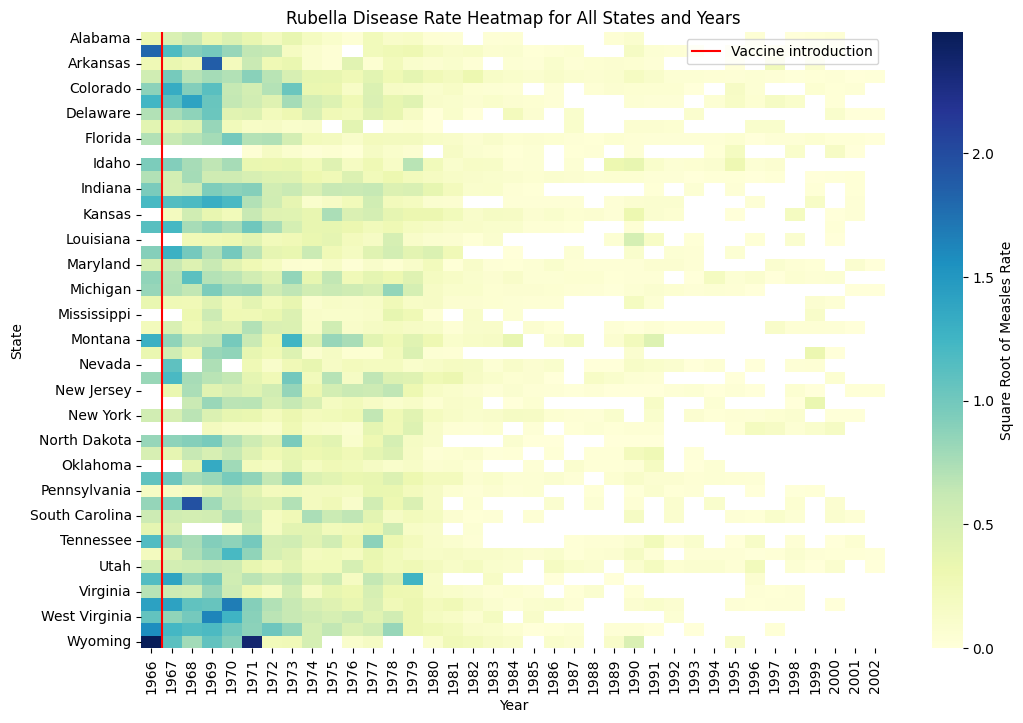

/var/folders/vs/kcjt58gj02q7hl49djt4j_v80000gn/T/ipykernel_20414/1853545627.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  disease_heatmap =  df_disease.pivot('state', 'year', 'sqrt_rate')


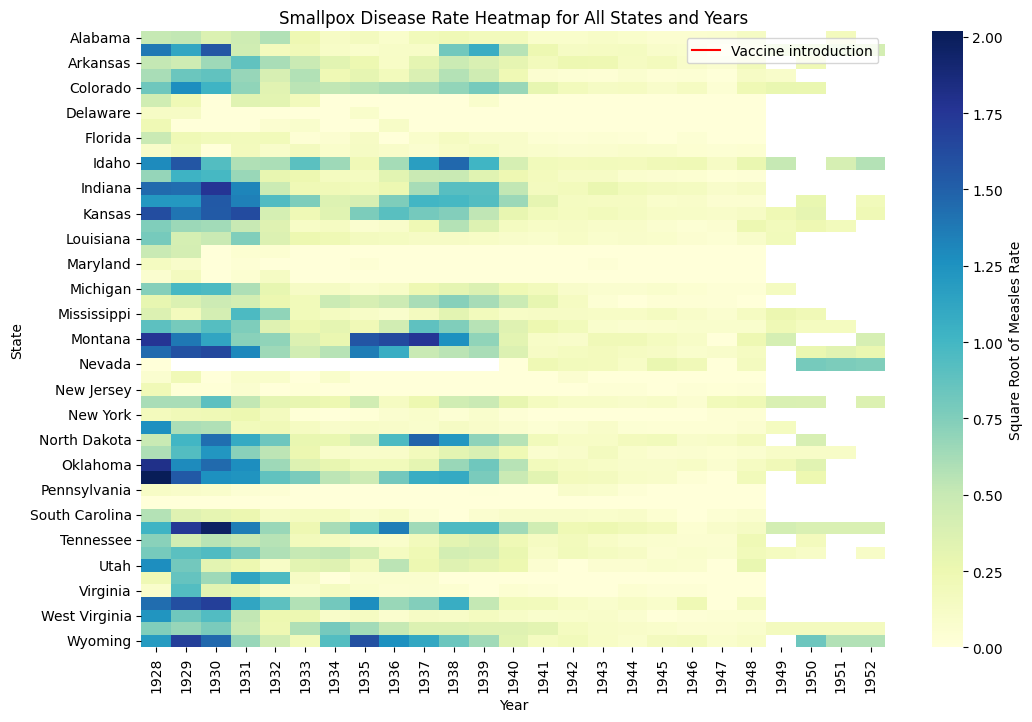

In [20]:
for disease in df['disease'].unique():
    df_disease = df[df['disease'] == disease]
    df_disease = df_disease[~df_disease['state'].isin(['Alaska', 'Hawaii'])].drop('disease', axis=1).drop('Unnamed: 0', axis=1).reset_index(drop=True)
    df_disease['rate'] = (df_disease['count'] / df_disease.weeks_reporting / df_disease['population']) * 1e5
    df_disease['sqrt_rate'] = np.sqrt(df_disease['rate'])
    disease_heatmap =  df_disease.pivot('state', 'year', 'sqrt_rate')
    plt.figure(figsize=(12, 8))

    sns.heatmap(disease_heatmap, cmap='YlGnBu', annot=False, fmt=".1f", cbar_kws={'label': 'Square Root of Measles Rate'})
    plt.axvline(x=vaccine_years[disease]-df_disease['year'].min(), color='red', label='Vaccine introduction')

    plt.xlabel('Year')
    plt.ylabel('State')
    plt.title(f'{disease} Disease Rate Heatmap for All States and Years')
    plt.legend()
    plt.show()


In [21]:
df_disease

,state,year,weeks_reporting,count,population,rate,sqrt_rate
0,Alabama,1928,51,341,2589923.0,0.258165,0.508099
1,Alabama,1929,52,378,2619131.0,0.277544,0.526824
2,Alabama,1930,52,192,2646248.0,0.139530,0.373537
3,Alabama,1931,52,295,2670818.0,0.212410,0.460879
4,Alabama,1932,52,467,2693027.0,0.333482,0.577479
...,...,...,...,...,...,...,...
1220,Wyoming,1948,24,1,280803.0,0.014838,0.121813
1221,Wyoming,1949,0,0,285544.0,NaN,NaN
1222,Wyoming,1950,1,2,290529.0,0.688399,0.829698
1223,Wyoming,1951,1,1,295744.0,0.338130,0.581490


In [22]:
from scipy import stats

In [33]:
for disease in ['Measles', 'Polio', 'Hepatitis A']:
    # disease = 'Measles'
    df_disease = df[df['disease'] == disease]
    df_disease = df_disease[~df_disease['state'].isin(['Alaska', 'Hawaii'])].drop('disease', axis=1).drop('Unnamed: 0', axis=1).reset_index(drop=True)
    df_disease['rate'] = (df_disease['count'] / df_disease.weeks_reporting / df_disease['population']) * 1e5
    # df_disease['sqrt_rate'] = np.sqrt(df_disease['rate'])
    year = vaccine_years.get(disease)

    pre_vac, post_vac = df_disease[df_disease['year'] < year], df_disease[df_disease['year'] >= year]

    pre_vac_mean, post_vac_mean = pre_vac['rate'].mean(), post_vac['rate'].mean()
    pre_vac_std, post_vac_std = pre_vac['rate'].std(), post_vac['rate'].std()
    pre_vac_samples, post_vac_samples = pre_vac.index.size, post_vac.index.size

    pre_vac_samples, post_vac_samples
    pre_vac_std, post_vac_std
    pre_vac_mean, post_vac_mean
    
    pre_vac_ar, post_vac_ar = pre_vac['rate'].to_numpy(), post_vac['rate'].to_numpy()

    t_statistic, p_value = stats.mannwhitneyu(pre_vac['rate'], post_vac['rate'], axis=0, nan_policy='omit')
    # t_statistic, p_value = stats.ttest_ind_from_stats(pre_vac_mean, pre_vac_std, pre_vac_samples, post_vac_mean, post_vac_std, post_vac_samples)

    print(disease)
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    print('-------------------------')

Measles
t-statistic: 2481191.0
p-value: 0.0
-------------------------
Polio
t-statistic: 518581.0
p-value: 1.2067673575762947e-62
-------------------------
Hepatitis A
t-statistic: 1026855.0
p-value: 3.9904898377100003e-202
-------------------------


In [30]:
pre_vac_ar

array([0.19188311, 0.17653228, 0.17833255, ..., 0.04205859, 0.08143552,
       0.14847518])